In [1]:
import pandas as pd
import graphviz 
from core.decision_tree import DecisionTree
from graph_visualize.dot_convertor import export2dot
from core.graph import Node
from numpy import zeros
from utils.help_functions import train_test_split

In [2]:
def make_tree(data,target,params):
    dt = DecisionTree()
    dt.learn(data=data, target=target, params=params)
    out_name = 'tree'
    dot_data = export2dot(out_name, dt.tree, writeId=True,writeSamples=True, write=False)
    graph = graphviz.Source(dot_data)
    return graph, dot_data, dt

In [3]:
iris = pd.read_csv('datasets/Iris.csv')

In [4]:
train, test = train_test_split(iris)

In [5]:
c45 = DecisionTree()
c45.C45(data=iris, target='Species', pruneLevel=3)

In [6]:
out_name = 'iris'
dot_data = export2dot(out_name, c45.tree, writeId=True)

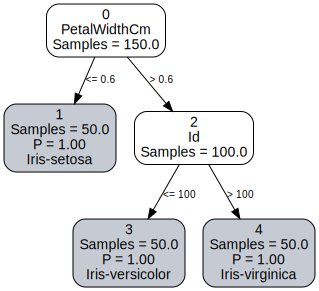

In [7]:
graph = graphviz.Source(dot_data)
graph

In [8]:
with open("iris_c45_1.dot", "w") as output:
    output.write(dot_data)
    output.close()

In [9]:
Y = test['Species'].values
res = c45.predict(test, vector=True)
acc = sum(res==Y) / test.shape[0]
print("Accuracy = {:.3f}".format(acc))

Accuracy = 1.000


In [10]:
params = {'criterion':'Renyi','alpha':-5,'pruneLevel': 3,'minSamples': 2}

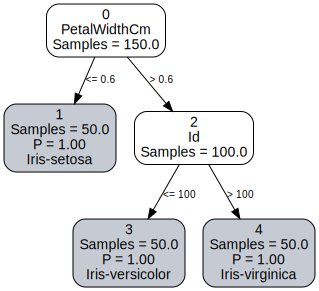

In [11]:
graph, dot_data, tree = make_tree(iris,'Species',params)
graph

In [12]:
Y = test['Species'].values
res = tree.predict(test, vector=True)
acc = sum(res==Y) / test.shape[0]
print("Accuracy = {:.3f}".format(acc))

Accuracy = 1.000
